You are given an m x n integer matrix grid where each cell is either 0 (empty) or 1 (obstacle). You can move up, down, left, or right from and to an empty cell in one step.

Return the minimum number of steps to walk from the upper left corner (0, 0) to the lower right corner (m - 1, n - 1) given that you can eliminate at most k obstacles. If it is not possible to find such walk return -1.

 

Example 1:

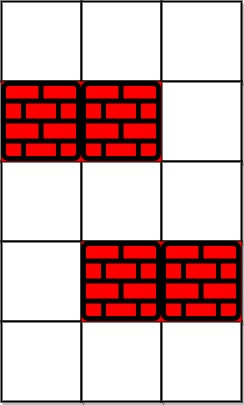

Input: grid = [[0,0,0],[1,1,0],[0,0,0],[0,1,1],[0,0,0]], k = 1
Output: 6
Explanation: 
The shortest path without eliminating any obstacle is 10.
The shortest path with one obstacle elimination at position (3,2) is 6. Such path is (0,0) -> (0,1) -> (0,2) -> (1,2) -> (2,2) -> (3,2) -> (4,2).

Example 2:

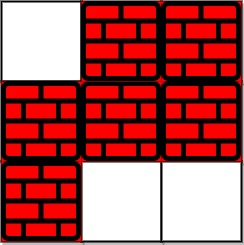

Input: grid = [[0,1,1],[1,1,1],[1,0,0]], k = 1
Output: -1
Explanation: We need to eliminate at least two obstacles to find such a walk.

 

Constraints:

    m == grid.length
    n == grid[i].length
    1 <= m, n <= 40
    1 <= k <= m * n
    grid[i][j] is either 0 or 1.
    grid[0][0] == grid[m - 1][n - 1] == 0



In [ ]:
class Solution:
    def shortestPath(self, grid: List[List[int]], k: int) -> int:
        m, n = len(grid), len(grid[0])
        # [1] this check significantly improves runtime, i.e.,
        #    we can use path (0,0) -> (0,n-1) -> (m-1,n-1)
        if k >= m + n - 2: return m + n - 2
       
        # [2] we use deque to store and update a BFS state that is
        #    (x, y, obstacles we can destroy, steps done so far)
        dq = deque([(0, 0, k, 0)])
        # [3] we also keep track of visited cells
        seen = set()
        
        while dq:
            i, j, k, s = dq.popleft()
            # [4] successfully reached lower right corner
            if (i,j) == (m-1,n-1) : return s
            
            # [5] scan all possible directions
            for ii, jj in [(i+1,j),(i-1,j),(i,j+1),(i,j-1)]:
                # [6] check boundaries and obstacles
                if 0 <= ii < m and 0 <= jj < n and k >= grid[ii][jj]:
                    # [7] make (and remember) a step
                    step = (ii, jj, k-grid[ii][jj], s+1)
                    if step[0:3] not in seen:
                        seen.add(step[0:3])
                        dq.append(step)
        
        # [8] failed to reach lower right corner
        return -1